# **ROB311 TP1** 

**Writing the algorithm of KNN from scratch and verifying it with two data sets** 

*Author: Yan CHEN & Dajing GU*

**1) Breast cancer wisconsin**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math
import itertools
from sklearn.metrics import classification_report, confusion_matrix
import operator
%matplotlib inline

Data loading

In [ ]:
# Assign the name of the attributes
name = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size',
         'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']
data_path = "./breast-cancer-wisconsin.data"

# Read dataset to Dataframe of Pandas
dataset = pd.read_csv(data_path, names=name)

# Eliminating the line of '?'
print('Size before eliminating :', dataset.shape) # Shape before
dataset.replace('?', np.nan, inplace=True)
dataset.dropna(axis=0, how='any', inplace=True)
print('Size after eliminating :', dataset.shape) # Shape after

# Display the data
dataset.head()


Size before eliminating : (699, 11)
Size after eliminating : (683, 11)


,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


Data preprocessing

In [ ]:
# Seperate the features and the targets
data = dataset.iloc[:, 1:-1] # Features
target = dataset.iloc[:, -1] # Labels
data = (data.values).astype(int)
target = (target.values).astype(int)

# Divide the dataset into testset and trainingset. The testset accounts for test_size % of dataset
train, test, trainlabel, testlabel = train_test_split(data, target, test_size=0.2, random_state=2)

print('training data size: ', train.shape)

print('test data size: ', test.shape)


training data size:  (546, 9)
test data size:  (137, 9)


These figures show the difference between the benign and malignant cancer in each feature. It can be seen that the benign has small values in all the features while the values for malignant cancer are more various and often bigger. 

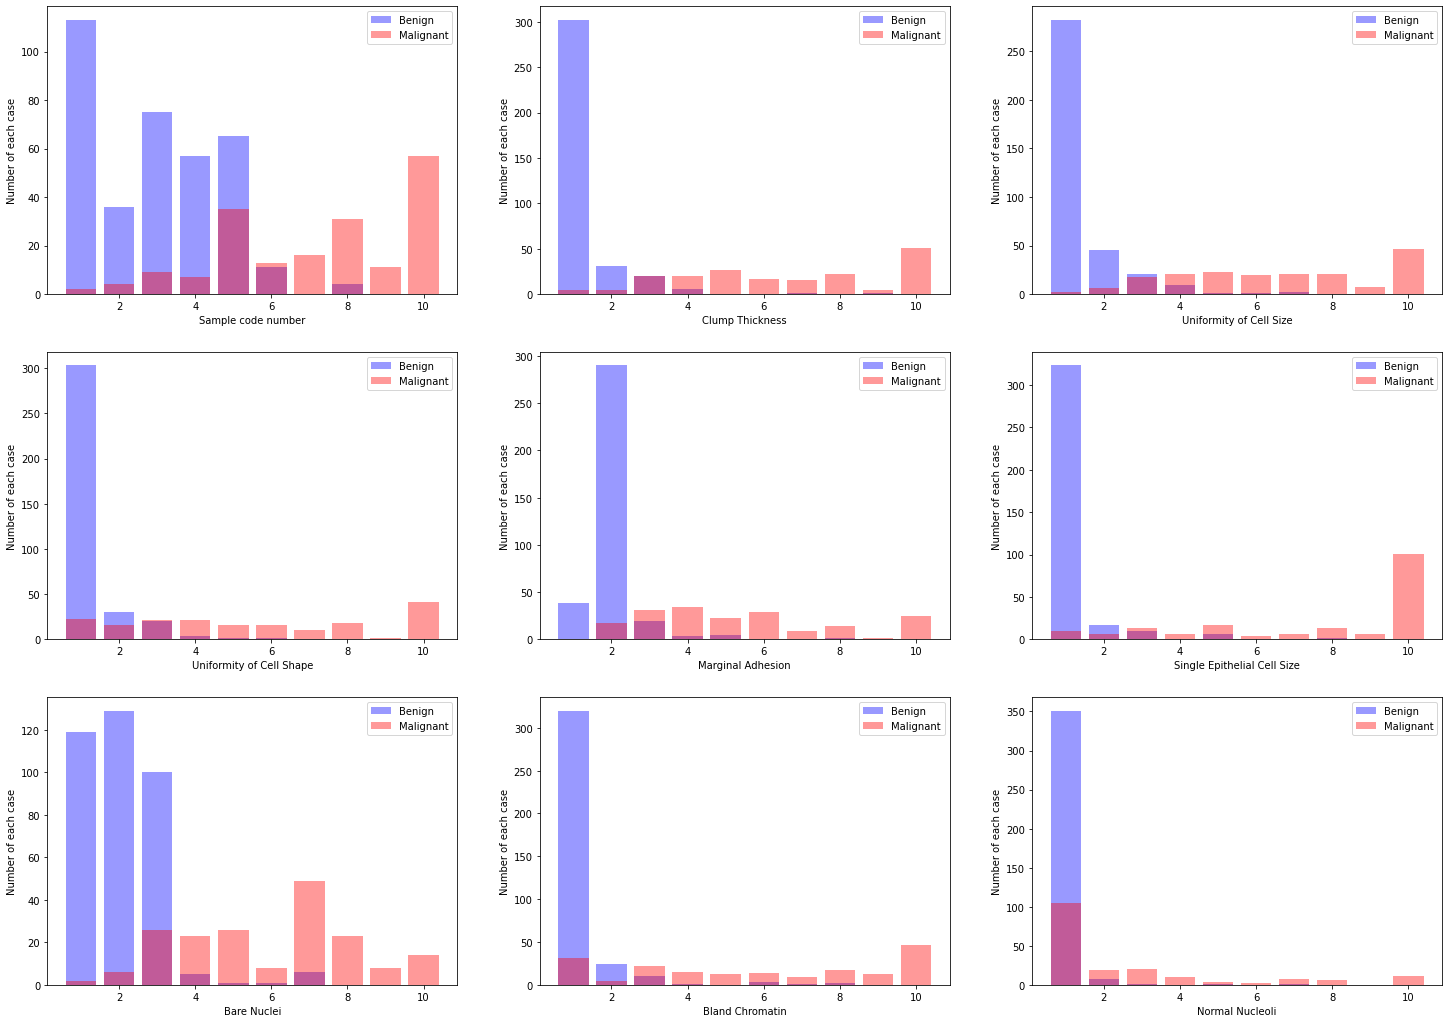

In [ ]:
# https://blog.csdn.net/u012193416/article/details/79469770
def plot_data(train, trainlabel, name, prows, pcolumns, class1, class2, labels):
    '''
    train: the train dataset
    name: the list of the name of the xlabels
    prows: these diagrams will be divided into prows rows
    pcolumns: these diagrams will be divided into pcolumns colums
    class1: the first label
    class2: the second label
    labels: the list of the name of the labels
    '''
    # Set the size of figures
    fig = plt.figure(figsize=(25, 18))
    cloms = train.shape[1]
    for i in range(cloms):
        plt.subplot(int(prows), int(pcolumns) , i+1)  
        plt.ylabel('Number of each case')
        plt.xlabel(name[i]) 

        value_list_1 = []  
        count_list_1 = [] 
        
        # plot the histogram of label 1
        values_1 = [item_x for item_x, item_y in zip(train[:, i].T, trainlabel) if int(item_y) == int(class1)]

        value_count_pair = pd.value_counts(values_1)  
        for k in dict(value_count_pair):     # separate the features' values and their numbers respectively
            value_list_1.append(k)
            count_list_1.append(value_count_pair[k])
        plt.bar(value_list_1, count_list_1, alpha=0.4, label=labels[0], fc='b')

        # plot the histogram of label 2
        value_list_2 = []
        count_list_2 = []
        values_2 = [item_x for item_x, item_y in zip(train[:, i].T, trainlabel) if int(item_y) == int(class2)]
        value_count_pair = pd.value_counts(values_2)
        for i in dict(value_count_pair):
            value_list_2.append(i)
            count_list_2.append(value_count_pair[i])
        plt.bar(value_list_2, count_list_2, alpha=0.4, label=labels[1], fc='r')  

        plt.legend()

class_names = ['Benign', 'Malignant']
plot_data(train, trainlabel, name, 3, 3, 2, 4, class_names)

Algorithm of KNN

In [ ]:
# Reference : https://www.youtube.com/watch?v=JDhq3JoekWo
def knn(test, train, label, k, normalize=False):
    # calcule the total number of dataset
    data_size = train.shape[0]
    # copy the test dada
    test_copy = np.tile(test, (data_size, 1))
    # calcule the Euclidean distances 
    if normalize:
        diff = (test_copy - train)/(train.max()-train.min())
    else:
        diff = test_copy - train
    sqdiff = diff**2
    sumsqdiff = sqdiff.sum(axis = 1)
    dis = sumsqdiff**(0.5)
    #
    sortdis = dis.argsort()
    classcount = {}
    for i in range(k):
        votelabel = label[sortdis[i]]
        # Count the number of labels in each category
        classcount[votelabel] = classcount.get(votelabel,0)+1
    # Sort the classcount dictionaty accroding to the number of labels
    sortclasscount = sorted(classcount.items(), key=operator.itemgetter(1), reverse=True)
    # Return the the label that have the largest numbers
    return sortclasscount[0][0]

def getAccuracy(testSet, predictions):
  correct = 0
  for x in range(testSet.shape[0]):
    if testSet[x] == predictions[x]:
      correct += 1
  return (correct/float(testSet.shape[0])) * 100.0 

Code Testing

In [ ]:
# Creat a list for reserving the labels of test result
prediction = []
for i in range(test.shape[0]):
    prediction.append(knn(test[i], train, trainlabel, 3))
print("classification report : \n", classification_report(testlabel, prediction))
print("\n confusion matrix: \n", confusion_matrix(testlabel, prediction))
print("\n Accuracy: %.2f%% \n" %getAccuracy(testlabel, prediction))

classification report : 
               precision    recall  f1-score   support

           2       0.96      0.95      0.96        83
           4       0.93      0.94      0.94        54

    accuracy                           0.95       137
   macro avg       0.95      0.95      0.95       137
weighted avg       0.95      0.95      0.95       137


 confusion matrix: 
 [[79  4]
 [ 3 51]]

 Accuracy: 94.89% 



Normalized confusion matrix


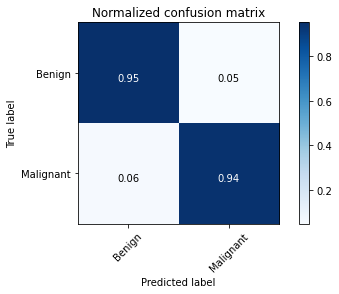

In [ ]:
Reference : https://blog.csdn.net/u012193416/article/details/79469770
def plot_confusion_matrix(cm, classes, normalize=False, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = 'Normalized confusion matrix'
        print("Normalized confusion matrix")
    else:
        title = 'Confusion matrix without normalization'
        print('Confusion matrix without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 verticalalignment='top',
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()  
    
cm = confusion_matrix(testlabel, prediction)
plot_confusion_matrix(cm, classes=class_names, normalize=True)

**2) Haberman**

In [ ]:
path = "./haberman.data"
name = ['Age of patient at time of operation', 'Patients year of operation', 
        'Number of positive axillary nodes detected', 'Survival status']
dataset_csv = pd.read_csv(path, names=name)
data = dataset_csv.iloc[:, :-1]
target = dataset_csv.iloc[:, -1]
data = (data.values).astype(int)
target = (target.values).astype(int)
train, test, trainlabel, testlabel = train_test_split(data, target, test_size=0.2, random_state=2)
prediction = []
for i in range(test.shape[0]):
    prediction.append(knn(test[i], train, trainlabel, 3, normalize=True))
print("classification report : ", "\n", classification_report(testlabel, prediction))
print("\n", "confusion matrix:", "\n", confusion_matrix(testlabel, prediction))
print("\n Accuracy: %.2f%% \n" %getAccuracy(testlabel, prediction))

classification report :  
               precision    recall  f1-score   support

           1       0.78      0.93      0.85        42
           2       0.75      0.45      0.56        20

    accuracy                           0.77        62
   macro avg       0.77      0.69      0.71        62
weighted avg       0.77      0.77      0.76        62


 confusion matrix: 
 [[39  3]
 [11  9]]

 Accuracy: 77.42% 



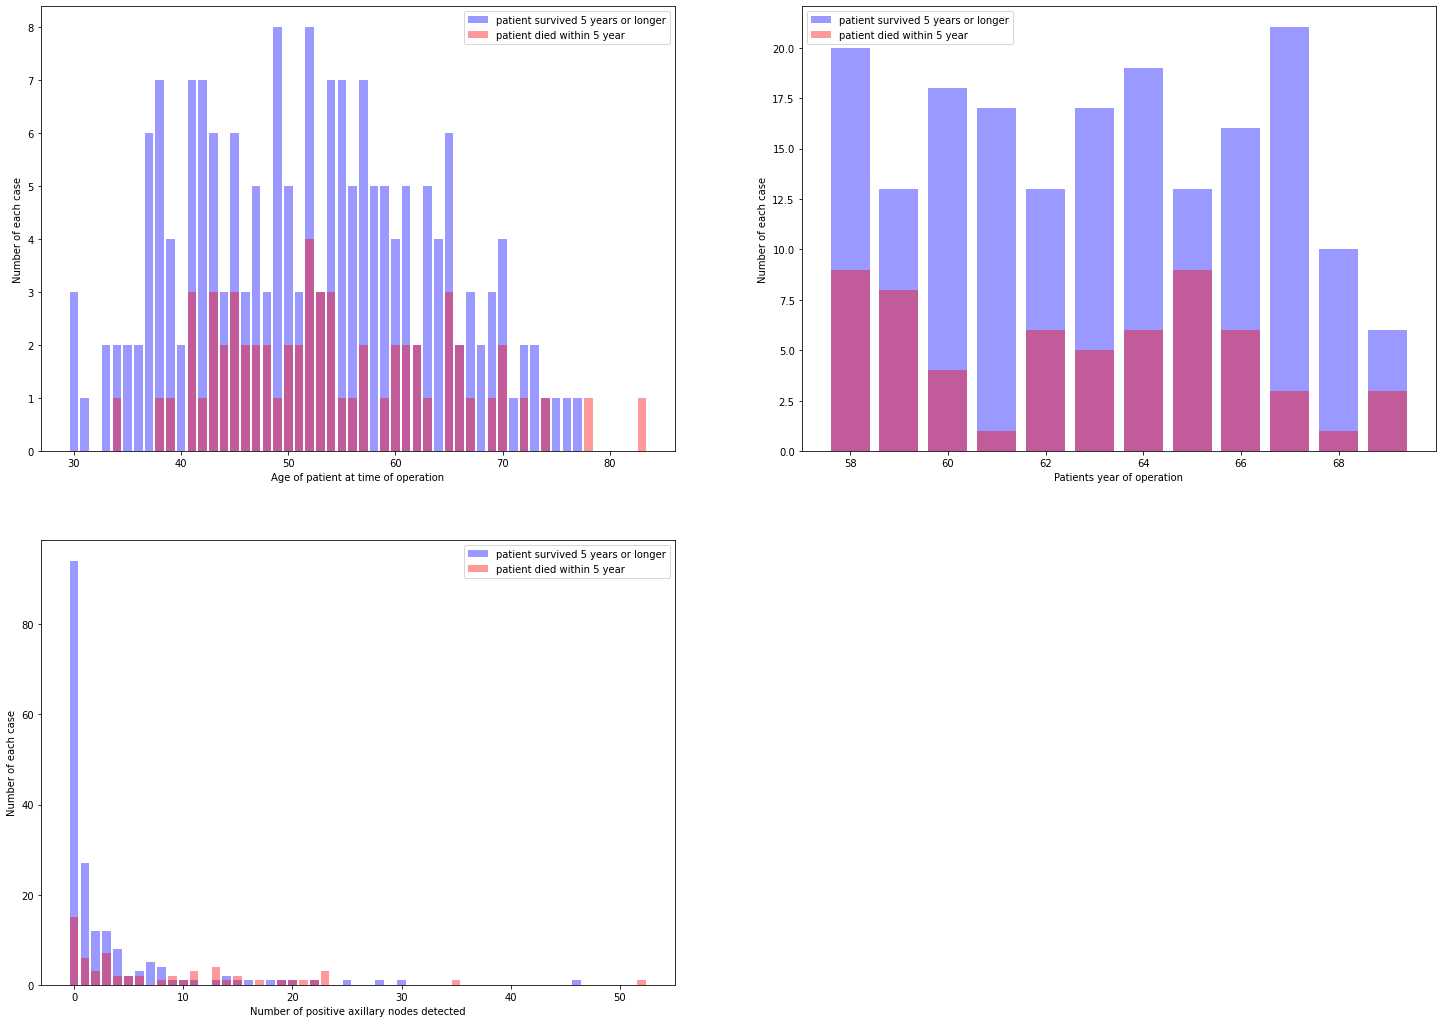

In [ ]:
class_names = ['patient survived 5 years or longer', 'patient died within 5 year']
plot_data(train, trainlabel, name, 2, 2, 1, 2, class_names)

Normalized confusion matrix


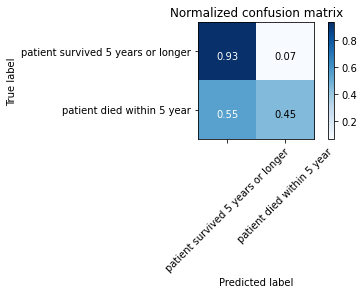

In [ ]:
cm = confusion_matrix(testlabel, prediction)

plot_confusion_matrix(cm, classes=class_names, normalize=True)